<a href="https://colab.research.google.com/github/Dario-Caf/Dario_CMPDA/blob/parallelism_MachineLearning/CNN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial on CNN
We try to build a DNN that recognize if an image contains a rectangle or a circle, count how many rectangle and circles are there or find where in the image the rectangle/circle is.

## Import useful stuff

In [ ]:
from keras.layers import  #FILL ME# Which layers will be needed in a CNN ?
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 

## Lets generate some data

We now generate ourself some images with a circle or a rectangle, of random color, in a random position.

Three different modes of generating the images are implemented:

*   A single shape per figure
*   Multiple shapes mixed in each figure
*   A single figure keeping track of the "bounding box"



### Additional Exercise
1. Try adding some random noise in the image background
2. Try adding more classes such e.g. Lines or Ellipses


In [ ]:
import cv2

simple =False #single shape per figure
mixed  =False #multi shapes per figure
withBB =True  #one shape with bounding boxes


def background():
  return np.zeros((64,64,3), np.uint8) #EX# How would you change this to add some background noise?

def randomColor():
  return (int(np.random.rand()*128+128),int(np.random.rand()*128+128),int(np.random.rand()*128+128))

def drawCircle(c,x,y,r):
  img = background()
  cv2.circle(img,(x,y),r,c, -1)
  return img,x-r,y-r,x+r,y+r   #return image and bounding box

def genCircle():
  return drawCircle(randomColor(),int(np.random.rand()*50)+10,int(np.random.rand()*50)+10,
                    int(np.random.rand()*6)+3)

def drawRectangle(c,x,y,w,h):
  img = background()
  cv2.rectangle(img,(x,y),((x+w),(y+h)), c, -1)
  return img,x,y,x+w,y+h #return image and bounding box

def genRectangle():
  return drawRectangle(randomColor(),int(np.random.rand()*40)+10,int(np.random.rand()*40)+10,
                       int(np.random.rand()*12)+5,int(np.random.rand()*12)+5)

def genN(f,i): # generate multiple shapes
  img = np.zeros((64,64,3), np.uint8)
  for x in range(i):
    img+=f()[0] #discard bb info, take only image
  return img

nsamples=50000

#produce figures with either a rectangle or a circle
if simple :
  targets=np.array([np.random.rand()>0.5 for x in range(nsamples) ])
  images=np.array([genCircle()[0] if targets[x] else genRectangle()[0] for x in range(nsamples)])

#produce figure with n rectangles and m circles
if mixed:
  targets=np.array([(int(np.random.rand()*4),int(np.random.rand()*4)) for x in range(nsamples) ])
  images=np.array([genN(genRectangle,targets[x,0])+genN(genCircle,targets[x,1]) for x in range(nsamples)])

if withBB : 
#produce figures with either a rectangle or a circle
  targets=np.array([np.random.rand()>0.5 for x in range(nsamples) ])
  imagesWithBB=[genCircle() if targets[x] else genRectangle() for x in range(nsamples)]
  images=np.array([imagesWithBB[x][0] for x in range(nsamples)])
  boundingBoxes=np.array([imagesWithBB[x][1:] for x in range(nsamples)])


Let's show a few of the generated images

(50000,)
(50000, 64, 64, 3)
[ True  True  True ...  True  True False]
[ True  True]


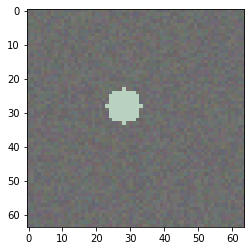

(50000, 4)
[[23 23 33 33]
 [ 8 16 20 28]]


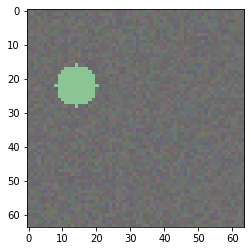

In [ ]:
#FILL ME# print the shape of the images and target data
#FILL ME# print the the first N entries of the target data

#show the first 4 images#
for i in range(4):
  plt.imshow(images[i])
  plt.show()

#
#if withBB:
#  FILL ME#  print bounding box shapes and first N entries
  


## Additional Exercise
3. If we have more categories (let say N) we should use a categorical label that is a vector of length N with 1 on the category(/ies) the image belong to and 0 in the others. Try to build a categorical label for two categories 

4. Expand the categorical label to  Ellispes or  Lines  and possibly also non exclusive categories such has 2D vs 1D objects

In [ ]:
#QUESTION# What are the tensors now corresponding to "X" and "y" (with previous lecture notation) ?
if withBB :
    labels=[targets,boundingBoxes] 
else:
    labels=targets



# Let's build a CNN 

Now we build our first CNN. We have some Conv layers interleaved with MaxPooling, and finally we flatten the output of the convolutional stack and appply a Dense FF:
![alt text](https://missinglink.ai/wp-content/uploads/2019/08/LeNet-5-1998.png)


### MaxPooling
![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

### Additional Exercise
5. Try adding/removing convolutional layers, change the kernel size, try to add dropout
6. Try changing the model to categorical labels, change loss function from binary_crossentropy to categorical_crossentropy, and use softmax activation instead of sigmoid


In [ ]:
inputs=Input(shape=(.... )) #FILL ME# What is the input shape?
# try building a CNN with three 2D Conv layers with a number of filters between 3 and 10
# interleave them with with Max  pooling layers
# then use the "Flatten" layer to forget the multidimensional shape
# add a final Feed Forward DNN

#FILL ME# now let's try to decide the output layer, the activation and the loss based on the problem we have 
if simple : 
  outputs =  #FILLME# what is the output shape in this case? which activation?
  loss=""  # [0,1] classification hence loss should be => .... ?
if mixed : 
  outputs = #FILL ME#  Here we want to predict how many rect? and how many Circ?
  loss='' #FILLME#
if withBB : #In this case we have two separate output layers, two target tensors, two losses
  output1 = Dense(1, activation='')(hidden) #FILLME# which activation for the circle vs rectangle classification? 
  output2 = Dense(4, activation='')(hidden) #FILLME# which activation to predict the 4 numbers of the bounding box ?
  outputs=[output1,output2]
  loss=["",""] #FILL ME # And which loss for each of the two outputs? (the final loss will be the sum unless we give them some additional weights)
  
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss=loss, optimizer='adam',metrics=['accuracy'])

model.summary()

#if withBB:
#FILL ME#  try to print the graph of the network in this case

SyntaxError: ignored

And now let's fit it to our data.
The sample is automatically split in two so that 50% of it is used for validation and the other half for training


In [ ]:
history=model.fit(....) #FILL ME# Who are "X" and "y" here?

Epoch 1/100
782/782 [==============================] - 10s 13ms/step - loss: 505.1486 - dense_2_loss: 1.6834 - dense_3_loss: 503.4650 - dense_2_accuracy: 0.5250 - dense_3_accuracy: 0.4863 - val_loss: 459.0627 - val_dense_2_loss: 0.9602 - val_dense_3_loss: 458.1024 - val_dense_2_accuracy: 0.5561 - val_dense_3_accuracy: 0.5070
Epoch 2/100
782/782 [==============================] - 9s 11ms/step - loss: 453.8395 - dense_2_loss: 0.8503 - dense_3_loss: 452.9892 - dense_2_accuracy: 0.5796 - dense_3_accuracy: 0.5128 - val_loss: 454.3188 - val_dense_2_loss: 0.7682 - val_dense_3_loss: 453.5505 - val_dense_2_accuracy: 0.5941 - val_dense_3_accuracy: 0.5073
Epoch 3/100
782/782 [==============================] - 9s 11ms/step - loss: 451.3809 - dense_2_loss: 0.7539 - dense_3_loss: 450.6269 - dense_2_accuracy: 0.5918 - dense_3_accuracy: 0.5128 - val_loss: 451.9731 - val_dense_2_loss: 0.7077 - val_dense_3_loss: 451.2656 - val_dense_2_accuracy: 0.6128 - val_dense_3_accuracy: 0.5074
Epoch 4/100
782/782 [

*history* contains information about the training.  We can now now show the loss vs epoch for both validation and training samples.




dict_keys(['loss', 'dense_2_loss', 'dense_3_loss', 'dense_2_accuracy', 'dense_3_accuracy', 'val_loss', 'val_dense_2_loss', 'val_dense_3_loss', 'val_dense_2_accuracy', 'val_dense_3_accuracy'])


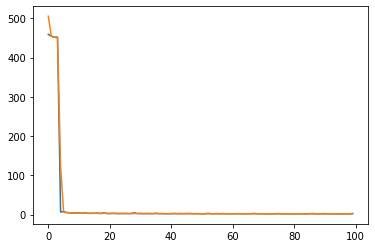

In [ ]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()
#plt.plot(history.history["val_accuracy"])
#plt.plot(history.history["accuracy"])
#plt.show()


Let's try to create a new image and evaluate it

41.98548126220703 39.485435485839844 57.44552993774414 53.05869674682617
It is a rectangle


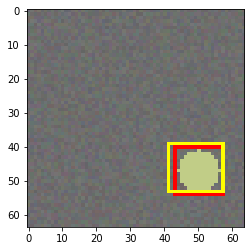

In [ ]:
#FILL ME# try to generate a new circle and check if the network recognizes it

if mixed :
  im= genCircle()[0]+genRectangle()[0]+genRectangle()[0]
  #FILL ME#try predicting on the "im" generated above... how do we access the number of predicted objects?
  #print("In this image there are %s rectangle and %s circles"%(....,....))
  plt.imshow(im)
  plt.show()

if withBB:
  im,x1,y1,x2,y2= genCircle()
  pre=model.predict(np.expand_dims(im,axis=0) )
  isCircle=pre[0][0]
  x1p=pre[1][0][0]-1.
  y1p=pre[1][0][1]-1.
  x2p=pre[1][0][2]+1.
  y2p=pre[1][0][3]+1.
  print(x1p,y1p,x2p,y2p)
  #print("Looks like a", ("circle" if model.predict(np.expand_dims(im,axis=0) )[0,1] > 0.5 else "rectangle"))
  print("It is a","circle" if isCircle > 0.5 else "rectangle" )
  cv2.rectangle(im,(x1-1,y1-1),(x2+1,y2+1), (255,0,0), 1)
  cv2.rectangle(im,(int(x1p),int(y1p)),(int(x2p),int(y2p)), (255,255,0), 1)
  plt.imshow(im)
  plt.show()
